# MachineLearningModel.ipynb
In this notebook we will create a machine learning model using for Texture Recognition using Haralick Texture Features  


Authors: Alexander Goudemond (219030365) and Sumeith Ishwanthlal (219006284)

In [1]:
import cv2
import numpy as np
from os import getcwd, walk
from mahotas import features
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import pickle

## Data Preprocessing

In [3]:
def extract_haralick_features(image):
        textures = features.haralick(image)
        hf_mean = textures.mean(axis=0)
        return hf_mean

In [4]:
def extract_colour_channels(image):
    return np.array([np.average(image[:, :, 0]), #average red 
                    np.average(image[:, :, 1]), #average green
                    np.average(image[:, :, 2]), #average blue
                    np.average(image)]) #average pixel value

In [5]:
def extract_hu_moments(image):
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [6]:
train_features_haralick = []
train_colour_channels = []
train_hu_moments = []

train_labels = []

haralick_features_R10 = []
haralick_features_R20 = []
haralick_features_R50 = []
haralick_features_R100 = []
haralick_features_R200 = []

colour_channels_R10 = []
colour_channels_R20 = []
colour_channels_R50 = []
colour_channels_R100 = []
colour_channels_R200 = []

hu_moments_R10 = []
hu_moments_R20 = []
hu_moments_R50 = []
hu_moments_R100 = []
hu_moments_R200 = []

currentDir = getcwd()
photoPath = currentDir + "\\Resized_Notes_DataSet"
path = walk(photoPath)
numProcessedImages = 0
print("Started to extract features from images")
for root, directories, files in path:
    for file in files:
        greyimage = cv2.imread("Resized_Notes_DataSet" + "\\" + file, cv2.IMREAD_GRAYSCALE)
        colImage = cv2.imread("Resized_Notes_DataSet" + "\\" + file, cv2.IMREAD_COLOR)

        haralick_features = extract_haralick_features(greyimage)
        train_features_haralick.append(haralick_features)

        hu_features = extract_hu_moments(greyimage)
        train_hu_moments.append(hu_features)

        colour_channels = extract_colour_channels(colImage)
        train_colour_channels.append(colour_channels)

        if "010" in file.split("_"):
            train_labels.append("R10") 
            haralick_features_R10.append(haralick_features)
            colour_channels_R10.append(colour_channels)
            hu_moments_R10.append(hu_features)
            
        if "020" in file.split("_"):
            train_labels.append("R20")
            haralick_features_R20.append(haralick_features)
            colour_channels_R20.append(colour_channels)
            hu_moments_R20.append(hu_features)

        if "050" in file.split("_"):
            train_labels.append("R50")
            haralick_features_R50.append(haralick_features)
            colour_channels_R50.append(colour_channels)
            hu_moments_R50.append(hu_features)
        
        if "100" in file.split("_"):
            train_labels.append("R100")
            haralick_features_R100.append(haralick_features)
            colour_channels_R100.append(colour_channels)
            hu_moments_R100.append(hu_features)
        
        if "200" in file.split("_"):
            train_labels.append("R200")
            haralick_features_R200.append(haralick_features)
            colour_channels_R200.append(colour_channels)
            hu_moments_R200.append(hu_features)
        
        numProcessedImages += 1
        if numProcessedImages % 5 == 0:
            print(f"Processed {numProcessedImages} images...")

Started to extract features from images
Processed 5 images...
Processed 10 images...
Processed 15 images...
Processed 20 images...
Processed 25 images...
Processed 30 images...
Processed 35 images...
Processed 40 images...
Processed 45 images...
Processed 50 images...
Processed 55 images...


In [7]:
print(f"The first 5 Training features: \n{train_features_haralick[:5]}")

The first 5 Training features: 
[array([ 2.21735310e-03,  2.44882308e+01,  9.89739846e-01,  1.19330041e+03,
        4.62530546e-01,  3.26819293e+02,  4.74871340e+03,  7.87819762e+00,
        1.04907269e+01,  7.74987469e-04,  3.05994005e+00, -4.82180924e-01,
        9.99256553e-01]), array([ 1.20108062e-03,  1.13388904e+02,  9.62949707e-01,  1.53006977e+03,
        3.14995920e-01,  3.26316145e+02,  6.00689018e+03,  8.07467024e+00,
        1.17076166e+01,  3.97791456e-04,  4.01307517e+00, -3.51088010e-01,
        9.96104340e-01]), array([ 7.64297360e-04,  7.87853363e+01,  9.77069865e-01,  1.71774336e+03,
        3.24528752e-01,  3.59658595e+02,  6.79218809e+03,  8.22449889e+00,
        1.16125961e+01,  4.67528431e-04,  3.73512105e+00, -3.95202558e-01,
        9.98115093e-01]), array([ 6.19590581e-04,  2.97784925e+02,  9.11337101e-01,  1.67917418e+03,
        1.85281168e-01,  3.25753995e+02,  6.41891179e+03,  8.08981896e+00,
        1.25459982e+01,  2.15247560e-04,  4.79594544e+00, -2.411

In [8]:
print(f"The first 5 Training average pixels: \n{train_colour_channels[:5]}")

The first 5 Training average pixels: 
[array([149.44164276, 179.03445625, 138.08300591, 155.51970164]), array([149.1907959 , 178.79446983, 137.83278275, 155.27268283]), array([157.14299011, 193.58179092, 161.51134682, 170.74537595]), array([148.86021233, 178.54326439, 137.53833199, 154.9806029 ]), array([182.90674973, 206.52408028, 191.63935089, 193.6900603 ])]


In [9]:
print(f"The first 5 train hu moments: \n{train_hu_moments[:5]}")

The first 5 train hu moments: 
[array([1.31191746e-03, 6.59618352e-07, 2.45967472e-11, 2.68422439e-11,
       6.89109838e-22, 2.15962088e-14, 2.87872478e-23]), array([1.31398252e-03, 6.61836906e-07, 2.48447379e-11, 2.71252309e-11,
       7.03564630e-22, 2.18611925e-14, 2.91868946e-23]), array([1.20014855e-03, 5.52833583e-07, 1.93921556e-11, 2.31303266e-11,
       4.89140433e-22, 1.69440070e-14, 2.68255562e-23]), array([1.31611628e-03, 6.64021560e-07, 2.51368354e-11, 2.74469938e-11,
       7.20300403e-22, 2.21559669e-14, 3.02965050e-23]), array([ 1.09531805e-03,  4.39080633e-07,  1.64353010e-11,  2.17337484e-11,
        4.10093572e-22,  1.43878801e-14, -2.34326738e-23])]


In [10]:
print(f"The first 5 Training labels: {train_labels[:5]}")

The first 5 Training labels: ['R10', 'R10', 'R10', 'R10', 'R10']


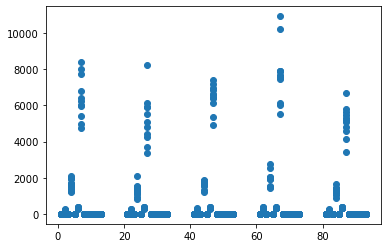

In [11]:
plt.scatter(x= [    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] * 11,
                    [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] * 11 ,
                    [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53] * 11, 
                    [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73] * 11,
                    [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93] * 11],
y = [haralick_features_R10,haralick_features_R20,haralick_features_R50,haralick_features_R100,haralick_features_R200])

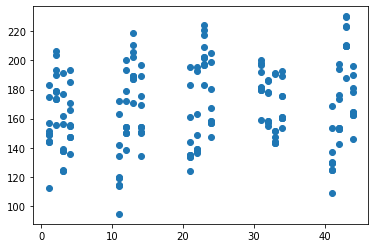

In [12]:
plt.scatter(x= [ [1, 2, 3, 4] * 11,[11, 12, 13, 14] * 11 ,[21, 22, 23, 24] * 11, [31, 32, 33, 34] * 11, [41, 42, 43, 44] * 11],
y = [colour_channels_R10,colour_channels_R20,colour_channels_R50,colour_channels_R100,colour_channels_R200])

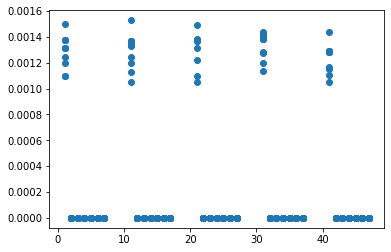

In [13]:
plt.scatter(x= [ [1, 2, 3, 4,5,6,7] * 11,
                [11, 12, 13, 14,15,16,17] * 11 ,
                [21, 22, 23, 24,25,26,27] * 11, 
                [31, 32, 33, 34,35,36,37] * 11,
                [41, 42, 43, 44,45,46,47] * 11],
y = [hu_moments_R10,hu_moments_R20,hu_moments_R50,hu_moments_R100,hu_moments_R200])

# Creating the Machine Learning Classifier

In [14]:
modelHaralick = LinearSVC(random_state = 9, max_iter = 100000000)
modelHaralick.fit(train_features_haralick, train_labels)
filename = 'modelHaralick.sav'
pickle.dump(modelHaralick, open(filename, 'wb'))

c:\Users\sumei\anaconda3\envs\COMP702Proj\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
modelColourChanels = LinearSVC(random_state = 9, max_iter = 100000000)
modelColourChanels.fit(train_colour_channels, train_labels)
filename = 'modelColourChanels.sav'
pickle.dump(modelColourChanels, open(filename, 'wb'))

In [16]:
modelHuMoments = LinearSVC(random_state = 9, max_iter = 100000000)
modelHuMoments.fit(train_hu_moments, train_labels)
filename = 'modelHuMoments.sav'
pickle.dump(modelHuMoments, open(filename, 'wb'))

# Evaluating Models

In [55]:
HaralickPredictionList = []
ColourChanelsPredictionList = []
HuMomentsPredictionList = []

predictionTestList = []
currentDir = getcwd()
photoPath = currentDir + "\\MessedUp_Notes_DataSet"
path = walk(photoPath)
for root, directories, files in path:
    for file in files:
        greyimage = cv2.imread(root + "\\" + file, cv2.IMREAD_GRAYSCALE)
        colImage = cv2.imread(root + "\\" + file, cv2.IMREAD_COLOR)

        haralick_features = extract_haralick_features(greyimage)
        hu_features = extract_hu_moments(greyimage)
        colour_channels = extract_colour_channels(colImage)

        predictionHaralick = modelHaralick.predict(haralick_features.reshape(1, -1))[0]
        predictionColourChanels = modelColourChanels.predict(colour_channels.reshape(1, -1))[0]
        predictionHuMoments = modelHuMoments.predict(hu_features.reshape(1, -1))[0]
        
        HaralickPredictionList.append(predictionHaralick)
        ColourChanelsPredictionList.append(predictionColourChanels)
        HuMomentsPredictionList.append(predictionHuMoments)


        colour_channels = extract_colour_channels(colImage)
        
        if "010" in file.split("_"):
            predictionTestList.append("R10")
            
        elif "020" in file.split("_"):
            predictionTestList.append("R20")

        elif "050" in file.split("_"):
            train_labels.append("R50")
        
        elif "100" in file.split("_"):
            predictionTestList.append("R100")
        
        elif "200" in file.split("_"):
            predictionTestList.append("R200")


In [57]:
total = 0
numHaralickPred = 0
numColourPred = 0
numHuMoments = 0

for index in range(len(predictionTestList)):
    if predictionTestList[index] == HaralickPredictionList[index]:
        numHaralickPred += 1

    if predictionTestList[index] == ColourChanelsPredictionList[index]:
        numColourPred += 1

    if predictionTestList[index] == HuMomentsPredictionList[index]:
        numHuMoments += 1

    total +=1

print(total)
print(f"The accuracy for the model which uses Haralick features: {numHaralickPred/total *100}")
print(f"The accuracy for the model which uses Colour Channel features: {numColourPred/total *100}")
print(f"The accuracy for the model which uses Hu Moments: {numHuMoments/total *100}")


44
The accuracy for the model which uses Haralick features: 31.818181818181817
The accuracy for the model which uses Colour Channel features: 50.0
The accuracy for the model which uses Hu Moments: 25.0
